In [3]:
import pandas as pd
import numpy as np
import os
from tabulate import tabulate
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
pd.set_option('display.max_colwidth', None)
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [9]:
df = pd.read_excel("data/csr/제조서비스팀_23년생산성지표.XLSX", sheet_name='23년_CSR_전체')
print(df)
df_real = df[['요청자 소속사','담당업무','제목','완료일','요청자명','접수자명(최초)','처리자명', '처리유형','처리방안','업무유형지수']]

          요청사  요청자 소속사      CSR ID GW승인문서 담당업무  \
0     태광산업(주)  태광산업(주)   110000120    NaN   MM   
1     태광산업(주)  대한화섬(주)   110000121    NaN   PP   
2     태광산업(주)  태광산업(주)   110000123    NaN   공통   
3     태광산업(주)  태광산업(주)   110000124    NaN   PP   
4     태광산업(주)  태광산업(주)   110000125    NaN   CO   
...       ...      ...         ...    ...  ...   
4049     TSIS     TSIS  TS23000148    NaN   MM   
4050     TSIS     TSIS  TS23000149    NaN   MM   
4051     TSIS     TSIS  TS23000150    NaN   MM   
4052     TSIS     TSIS  TS23000152    NaN   FI   
4053     TSIS     TSIS  TS23000155    NaN   MM   

                                  제목 요청일(최초) 요청일(결재완료) 요청자명 접수일(최초)  ...  \
0                           수입 피오 문의     NaT       NaT  김희준     NaT  ...   
1                     자재마스터 변경 처리 지원     NaT       NaT  김병희     NaT  ...   
2                       ZCSR 삭제방법 문의     NaT       NaT  김희준     NaT  ...   
3                      재공처리 실적 취소 지원     NaT       NaT  최한태     NaT  ...   
4     수출제비용 전표 전기 시

In [9]:
#티시스는 데이터 입력방식이 다르기 때문에 제거, 담당업무가 미지정,DMS인 경우 삭제 
df_real =df_real.loc[((df_real['요청자 소속사']!='TSIS') &(df_real['처리자명']!='이주용') )] # TSIS 약 126건 삭제 & 처리자가 이주용인경우 삭제
df_real['건수']=1 #건수 계산을 위한 컬럼 생성
print(len(df_real))
print(tabulate(df_real[['담당업무','처리유형','처리방안']].describe(),  headers='keys', tablefmt='psql', showindex=True))

3916
+--------+------------+------------+----------------------+
|        | 담당업무   | 처리유형   | 처리방안             |
|--------+------------+------------+----------------------|
| count  | 3916       | 3915       | 3906                 |
| unique | 25         | 3          | 11                   |
| top    | MM         | A 수동등록 | 업무 의뢰(확인/실행) |
| freq   | 692        | 2736       | 1957                 |
+--------+------------+------------+----------------------+


Text(3.5, 143.35625000000002, '평균점수 : 128.356,     표준편차 : 130.962')

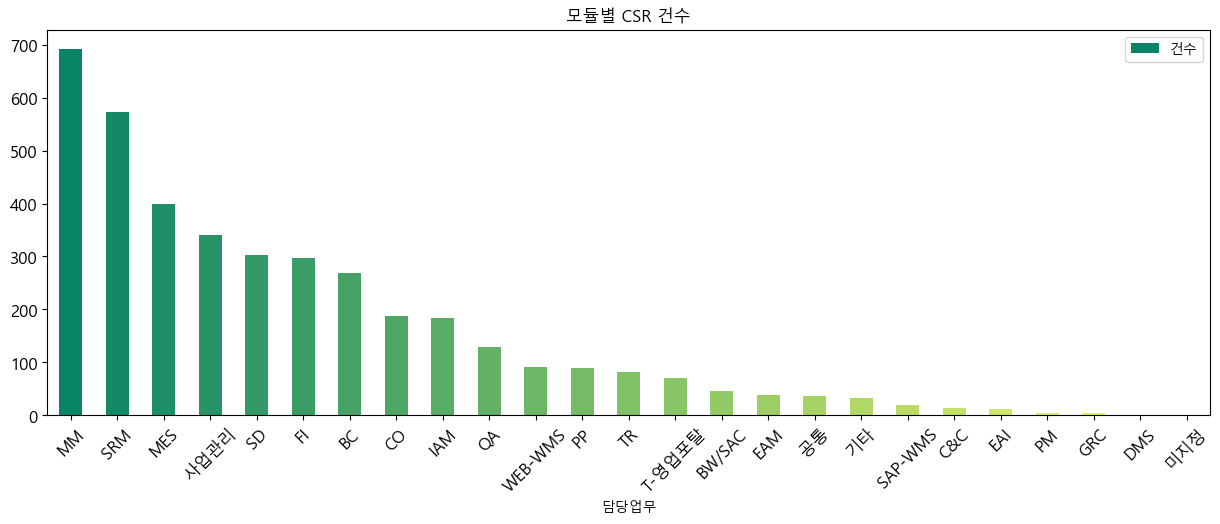

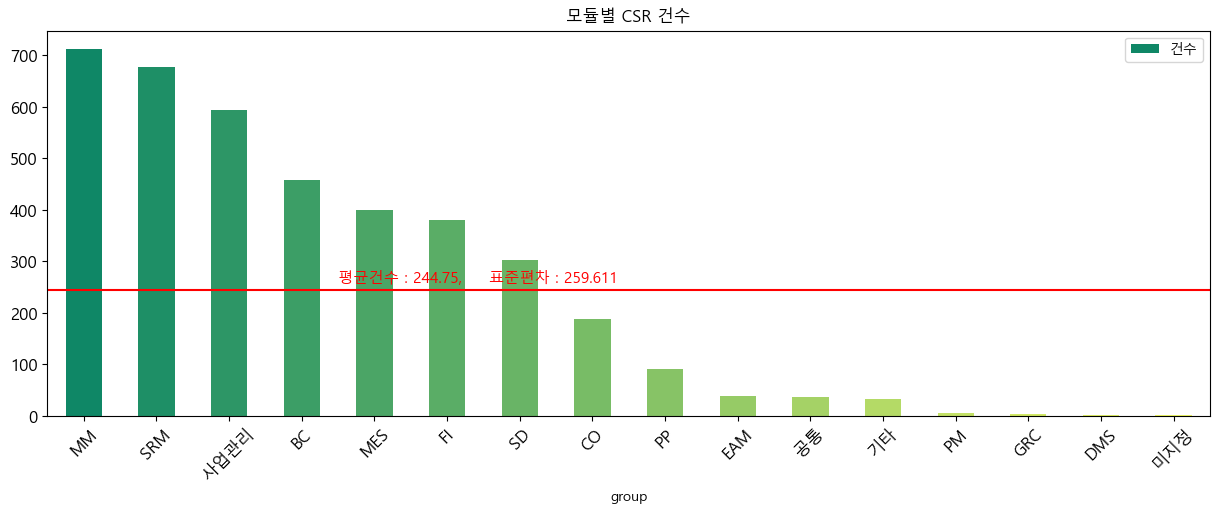

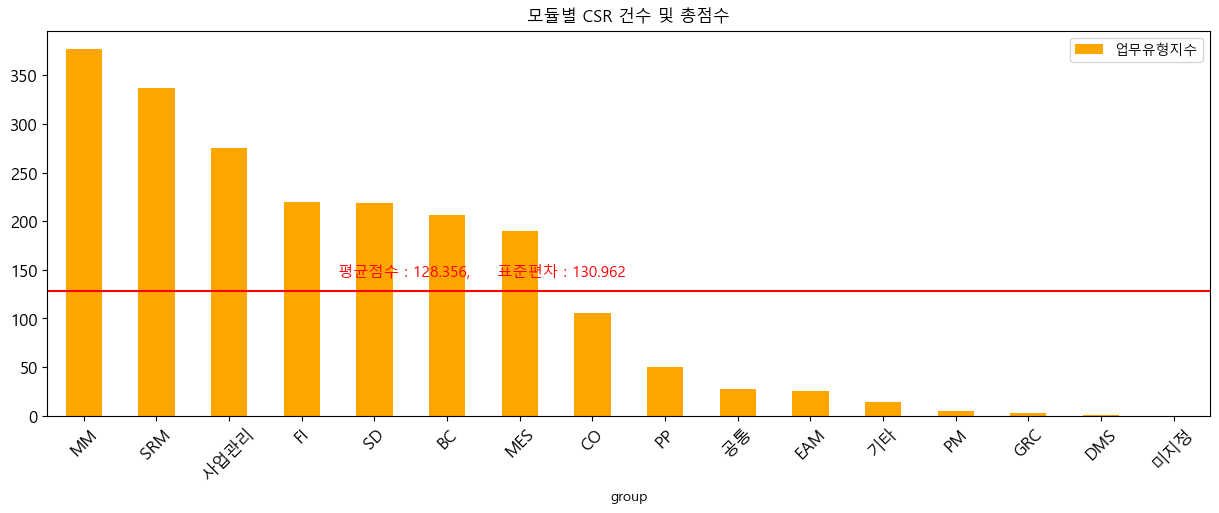

In [10]:
#담당업무별 CSR 총 건수
csr_sub =df_real.groupby(['담당업무'], sort=True)['건수'].sum().reset_index()
csr_sub =csr_sub.sort_values(by=['건수'],  ascending=False)
csr_sub['건수'].mean()
colors = sns.color_palette('summer', len(csr_sub))
csr_sub.plot.bar(x='담당업무', y='건수', figsize=(15,5),fontsize=12,rot=45, title="모듈별 CSR 건수", color=colors)

#그룹별로 묶어서 보기 
# 1. SRM & WEB-WMS & C&C
# 2. MES
# 3. MM, SAP-WMS
# 4. SD
# 5. I-AM, 사업관리, 영업포탈
# 6. BW/SAC, EAI, QA, BC
# 7. PP
# 8. CO
# 9. FI, TR

name_mapping = {'SRM': 'SRM','WEB-WMS': 'SRM','C&C': 'SRM',
                'MES': 'MES',
                'MM': 'MM','SAP-WMS': 'MM',
                'SD': 'SD',
                'IAM': '사업관리','사업관리': '사업관리','T-영업포탈': '사업관리',
                'BW/SAC': 'BC','EAI': 'BC','QA': 'BC','BC': 'BC',
                'PP': 'PP',
                'CO': 'CO',
                'FI': 'FI', 'TR': 'FI'}
func = lambda x: name_mapping.get(x, x)
df_real['group'] = df_real.담당업무.map(func)


#담당업무별 CSR 총 건수
csr_sub_group =df_real.groupby(['group'], sort=True)[['건수']].sum().reset_index()
csr_sub_group =csr_sub_group.sort_values(by=['건수'],  ascending=False)
colors = sns.color_palette('summer', len(csr_sub_group))
csr_sub_group.plot.bar(x='group', y='건수', figsize=(15,5),fontsize=12,rot=45, title="모듈별 CSR 건수",color=colors)
plt.axhline(y=csr_sub_group['건수'].mean(),color='red')
plt.text(3.5,csr_sub_group['건수'].mean()+15,'평균건수 : {},     표준편차 : {}'.format(round(csr_sub_group['건수'].mean(),3),round(csr_sub_group['건수'].std(),3)),fontsize=11, color ='red')


#담당업무별 CSR 총 건수
csr_sub_group =df_real.groupby(['group'], sort=True)[['업무유형지수']].sum().reset_index()
csr_sub_group =csr_sub_group.sort_values(by=['업무유형지수'],  ascending=False)
csr_sub_group
colors = sns.color_palette('OrRd', len(csr_sub_group))
csr_sub_group.plot.bar(x='group', y='업무유형지수', figsize=(15,5),fontsize=12,rot=45, title="모듈별 CSR 건수 및 총점수", color='orange')
plt.axhline(y=csr_sub_group['업무유형지수'].mean(),color='red')
plt.text(3.5,csr_sub_group['업무유형지수'].mean()+15,'평균점수 : {},     표준편차 : {}'.format(round(csr_sub_group['업무유형지수'].mean(),3),round(csr_sub_group['업무유형지수'].std(),3)),fontsize=11, color ='red')


In [11]:
#각 모듈별 처리자별 건수 차이
data =df_real.groupby(['group','처리자명'], sort=True)['건수'].sum().reset_index()
data_pivot = pd.DataFrame(data.pivot(index='group',columns='처리자명', values='건수'))
#print(data_pivot.fillna(0).astype('int'))
'''
for i in range(0,len(data_pivot)):
    data = data_pivot.iloc[i,0:]
    print('---------')
    print(data.name)
    print('---------')
    data =data.dropna()
    aa = pd.DataFrame(data)
    print(aa)
    
    #plot
'''
data_pivot.fillna(0).astype('int').style.highlight_between(left=4, right=1000, axis=1, props='color:white; background-color:slateblue;')



처리자명,강우석,강원호,권덕호,김가을,김동욱,김민회,김태경,김희준,서단비,서성민,성보승,양승원,이누리,정원교,조현덕,차은주
group,,,,,,,,,,,,,,,,
BC,0,0,0,0,0,0,455,0,1,0,1,0,0,0,0,0
CO,0,0,0,80,107,0,0,0,0,0,0,0,0,0,0,0
DMS,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
EAM,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0,1
FI,0,0,0,0,0,0,0,0,257,0,1,122,0,0,0,0
GRC,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0
MES,373,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0
MM,0,0,0,0,0,0,0,0,0,0,568,0,144,0,0,0
PM,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,1


<Axes: title={'center': '모듈별 CSR 처리 유형별 점수- 전산처리한것만'}, xlabel='group'>

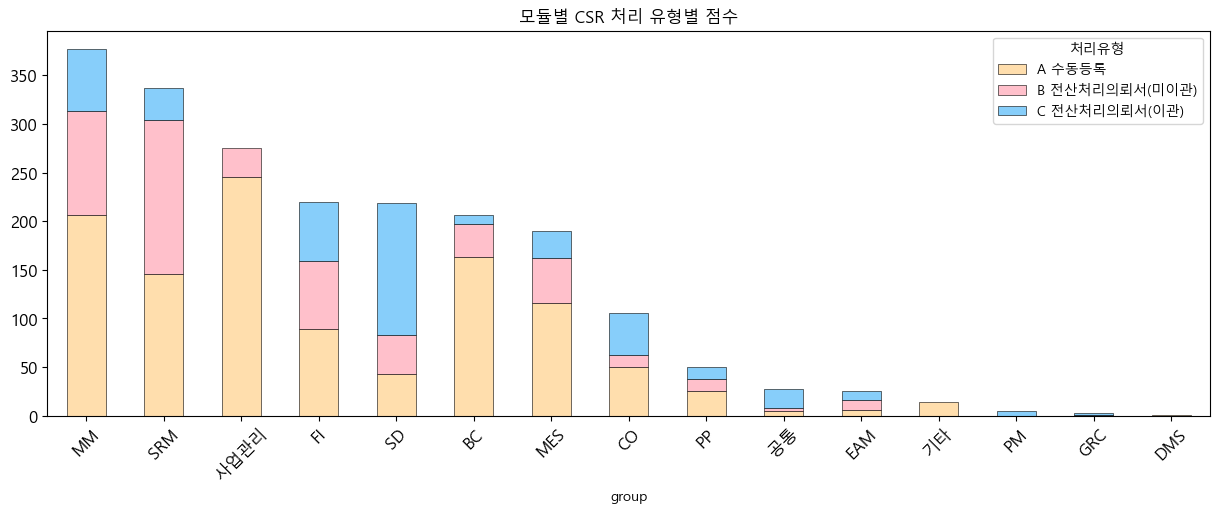

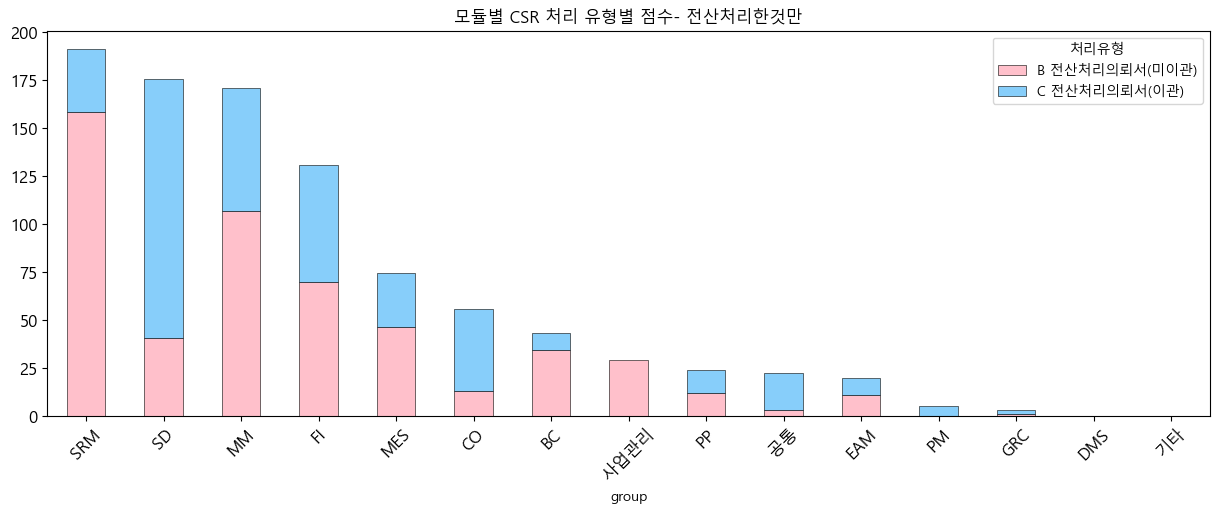

In [12]:
data =df_real.groupby(['group','처리유형'], sort=True)['업무유형지수'].sum().reset_index()
data_pivot = data.pivot(index='group',columns='처리유형', values='업무유형지수')
data_pivot['total'] = data_pivot.sum(axis=1)
data_pivot.sort_values('total', inplace=True, ascending=False)
#data_pivot =data_pivot.drop(['total'],axis=0, inplace=True)
#data_pivot.sort_values('cnt', ascending=False)[['담당업무','처리유형']]
data_pivot.iloc[0:,0:3].plot(kind='bar', title="모듈별 CSR 처리 유형별 점수", figsize=(15,5),fontsize=12,rot=45,stacked=True,color=['navajowhite','pink','lightskyblue'],edgecolor='black',linewidth=0.4)

data =df_real.groupby(['group','처리유형'], sort=True)['업무유형지수'].sum().reset_index()
data_pivot = data.pivot(index='group',columns='처리유형', values='업무유형지수')
data_pivot = data_pivot.iloc[0:,1:3]
data_pivot['total'] = data_pivot.sum(axis=1)
data_pivot.sort_values('total', inplace=True, ascending=False)
data_pivot.iloc[0:,0:2].plot(kind='bar', title="모듈별 CSR 처리 유형별 점수- 전산처리한것만", figsize=(15,5),fontsize=12,rot=45,stacked=True,color=['pink','lightskyblue'],edgecolor='black',linewidth=0.4)

<Axes: title={'center': '담당업무별 처리방안 차이'}, xlabel='담당업무'>

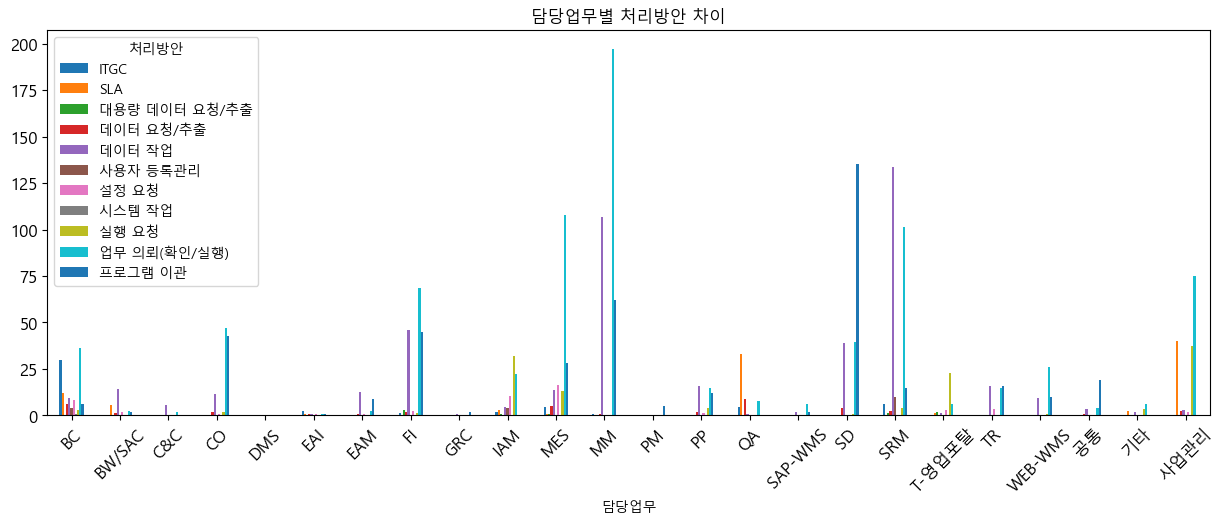

In [13]:
data =df_real.groupby(['담당업무','처리방안'], sort=True)['업무유형지수'].sum().reset_index()
data_pivot = data.pivot(index='담당업무',columns='처리방안', values='업무유형지수')
data_pivot.plot(kind='bar', title="담당업무별 처리방안 차이", figsize=(15,5),fontsize=12,rot=45)

In [21]:
#처리유형 나누기
df_A =df_real.loc[df_real['처리유형']=='A 수동등록'] #약 2746건
df_A_Score = df_A['업무유형지수'].sum()
print("수동등록건수 : {}건".format(len(df_A)))
print("수동등록 총점수 : {}점".format(df_A_Score))
print("---------------------------------------")
df_B =df_real.loc[df_real['처리유형']!='A 수동등록'] #약 765건
df_B_Score = df_B['업무유형지수'].sum()
print("자동등록건수 : {}건".format(len(df_B)))
print("자동등록 총점수 : {}점".format(round(df_B_Score,3)))

수동등록건수 : 2736건
수동등록 총점수 : 1110.1점
---------------------------------------
자동등록건수 : 1180건
자동등록 총점수 : 943.6점


처리방안   ITGC   SLA  대용량 데이터 요청/추출  데이터 요청/추출  데이터 작업  사용자 등록관리  설정 요청  실행 요청  \
group                                                                         
BC     33.0  48.0            0.4       16.0    12.0       1.8    7.8    1.8   
CO      NaN   NaN            NaN        1.4     0.6       0.1    0.6    1.8   
DMS     NaN   NaN            NaN        NaN     NaN       NaN    NaN    NaN   
EAM     NaN   NaN            NaN        0.4     3.0       NaN    0.6    NaN   
FI      1.2   NaN            2.8        2.0     0.6       NaN    1.2    NaN   
GRC     NaN   NaN            NaN        NaN     NaN       NaN    NaN    NaN   
MES     3.0   0.6            0.4        4.0     NaN       NaN    NaN    1.2   
MM      0.6   NaN            NaN        0.4     6.6       NaN    NaN    NaN   
PP      NaN   NaN            NaN        1.8     6.0       0.1    1.2    1.8   
SD      NaN   NaN            NaN        3.2     NaN       NaN    NaN    0.6   
SRM     3.6   NaN            0.8        1.8     NaN 

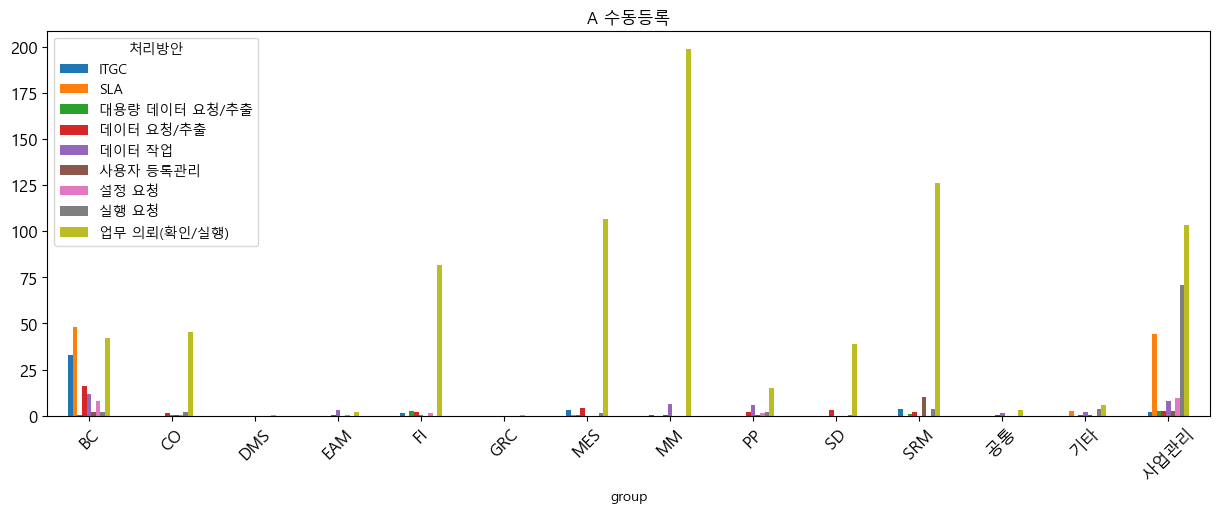

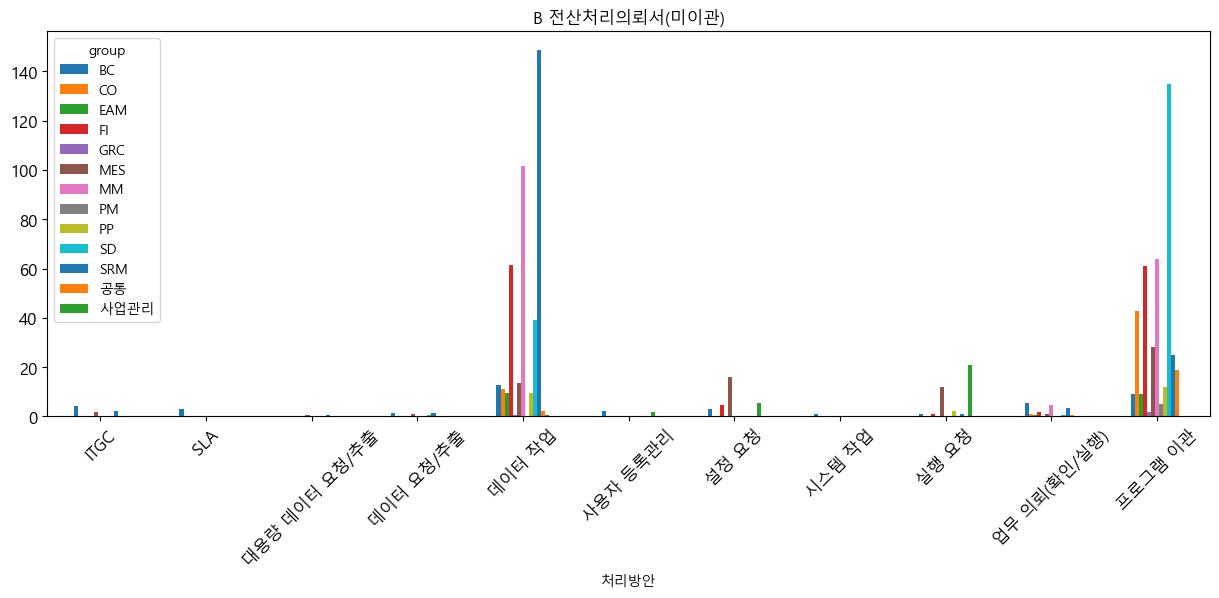

In [22]:
data =df_A.groupby(['group','처리방안'], sort=True)['업무유형지수'].sum().reset_index()
data_pivot = data.pivot(index='group',columns='처리방안', values='업무유형지수')
#data_pivot.sort_values('cnt', ascending=False)[['담당업무','처리유형']]
data_pivot.plot(kind='bar', title="A 수동등록", figsize=(15,5),fontsize=12,rot=45)
print(data_pivot)
data =df_B.groupby(['group','처리방안'], sort=True)['업무유형지수'].sum().reset_index()
data_pivot = data.pivot(index='처리방안',columns='group', values='업무유형지수')
#data_pivot.sort_values('cnt', ascending=False)[['담당업무','처리유형']]
data_pivot.plot(kind='bar', title="B 전산처리의뢰서(미이관)", figsize=(15,5),fontsize=12,rot=45)
print(data_pivot)